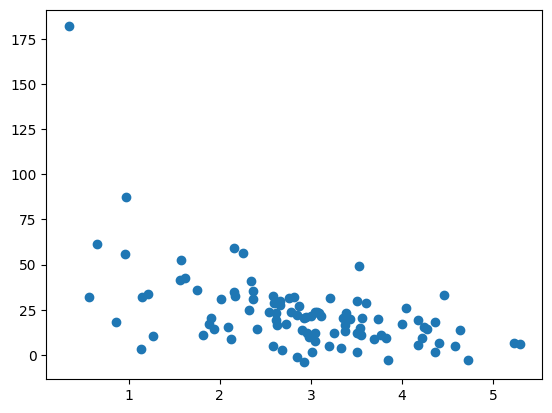

In [2]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

'''
mean - center value around data
st_dev - how spread the values around mean
size - number of values to generate
'''

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

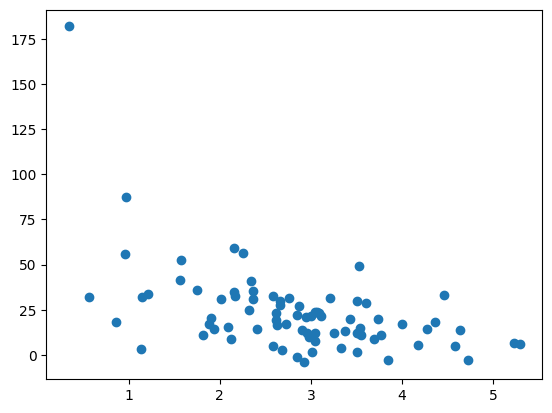

In [3]:
# 80 train / 20 test
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]

scatter(trainX, trainY)

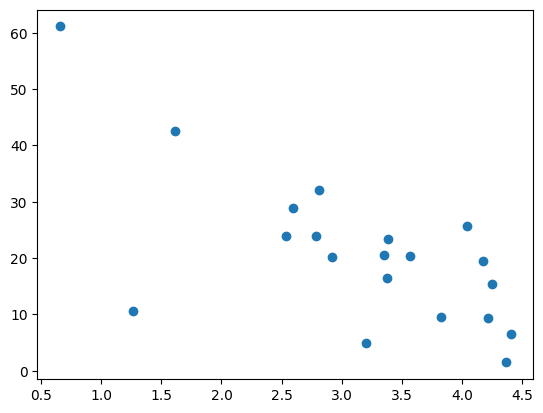

In [4]:
scatter(testX, testY)

In [5]:
# Train data
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x,y,8))

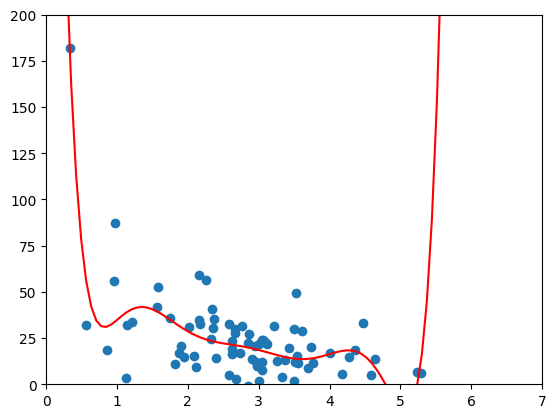

In [6]:
# Visualizing train data
import matplotlib.pyplot as plt

xp = np.linspace(0,7,100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(x,y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [7]:
# r-value of train data
from sklearn.metrics import r2_score
r2 = r2_score(testY, p4(testX))
print(r2)

0.30018168611498663


In [8]:
# r-value of test data
from sklearn.metrics import r2_score
r2 = r2_score(trainY, p4(trainX))
print(r2)

0.6427069514691666


In [9]:
# Test data
x = np.array(testX)
y = np.array(testY)

p4 = np.poly1d(np.polyfit(x,y,8))

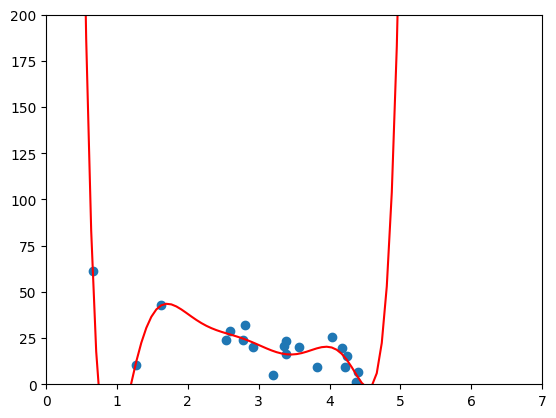

In [10]:
# Visualizing test data 8th degree
import matplotlib.pyplot as plt

xp = np.linspace(0,7,100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(x,y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [11]:
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn import svm

iris = datasets.load_iris()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

In [13]:
clf = svm.SVC(kernel='sigmoid', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.26666666666666666

In [27]:
import pandas as pd
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, C=1).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

results = pd.DataFrame({'Kernel': kernels, 'Score': scores})
best_kernel = results.loc[results['Score'].idxmax()]

print(results)

    Kernel     Score
0   linear  0.966667
1     poly  0.900000
2      rbf  0.933333
3  sigmoid  0.266667


The best kernel is **linear**, which has a score of 0.966667.